In [26]:
# generate opponent's data, 0 - paper, 1 - scissor, 2 - rock
import random
import numpy as np
import matplotlib.pyplot as plt
data = np.zeros((50,100),dtype = np.int32)
for i in range(50):
    for j in range(100):
        data[i][j] = random.choice([0,0,1,2])

In [27]:
# win-draw-lose table , mine- opp
tab = np.zeros((3,3))
tab[0,1] = -1
tab[1,2] = -1
tab[2,0] = -1
tab[1,0] = 1
tab[2,1] = 1
tab[0,2] = 1

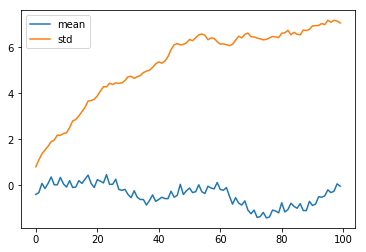

In [51]:
# deterministic 2 0 1
sd_deter = np.zeros((100,50))
for j in range(100):
    for i in range(50):
        pass_sd = sd_deter[j-1][i] if j>0 else 0
        sd_deter[j][i] = pass_sd + tab[(j+2)%3,data[i][j]]
deter_mean = np.mean(sd_deter,axis = 1) 
deter_std = np.std(sd_deter, axis = 1)
plt.plot(deter_mean)
plt.plot(deter_std)
plt.legend(['mean','std'])

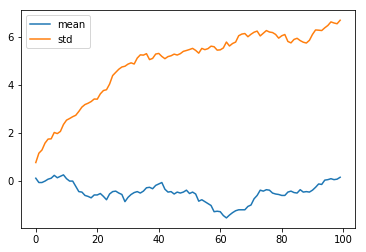

In [49]:
# stochastic 0 - paper, 1 - scissor, 2 - rock, beat  1 - scissor, 2 - rock 0 - paper
sd_sto = np.zeros((100,50))
for j in range(100):
    for i in range(50):
        pass_sd = sd_sto[j-1][i] if j>0 else 0
        sd_sto[j][i] = pass_sd + tab[random.choice([0,1,2]),data[i][j]]
sto_mean = np.mean(sd_sto,axis = 1) 
sto_std = np.std(sd_sto, axis = 1)
plt.plot(sto_mean)
plt.plot(sto_std)
plt.legend(['mean','std'])
# plt.plot(sd_sto)

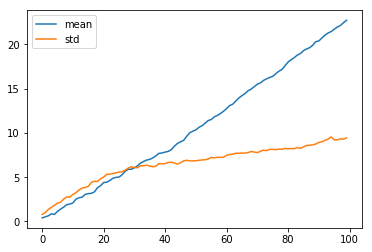

In [48]:
# optimal
sd_opt = np.zeros((100,50))
hist = hist = np.zeros((3,50))
for j in range(100):
    for i in range(50):
        choice = (np.argmax(hist[:,i], axis = 0) + 1)% 3
        pass_sd = sd_opt[j-1][i] if j>0 else 0
        sd_opt[j][i] = pass_sd + tab[choice,data[i][j]]
        hist[data[i][j]][i] += 1
opt_mean = np.mean(sd_opt,axis = 1) 
opt_std = np.std(sd_opt, axis = 1)
plt.plot(opt_mean)
plt.plot(opt_std)
plt.legend(['mean','std'])

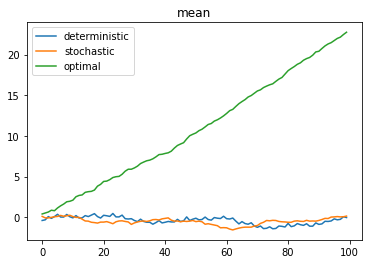

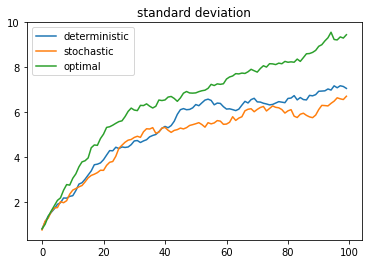

In [61]:
plt.figure()
plt.plot(deter_mean)
plt.plot(sto_mean)
plt.plot(opt_mean)
plt.legend(['deterministic','stochastic','optimal'])
plt.title('mean')
plt.savefig('./mean.png')
plt.figure()
plt.plot(deter_std)
plt.plot(sto_std)
plt.plot(opt_std)
plt.legend(['deterministic','stochastic','optimal'])
plt.title('standard deviation')
plt.savefig('./std.png')
